In [1]:
addprocs(20)

20-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21

In [2]:
using CBandits
using POMDPs
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [3]:
A = UniformActions2D()

CBandits.UniformActions2D((-2.0, 2.0), (-2.0, 2.0), Distributions.Uniform{Float64}[Distributions.Uniform{Float64}(a=-2.0, b=2.0), Distributions.Uniform{Float64}(a=-2.0, b=2.0)])

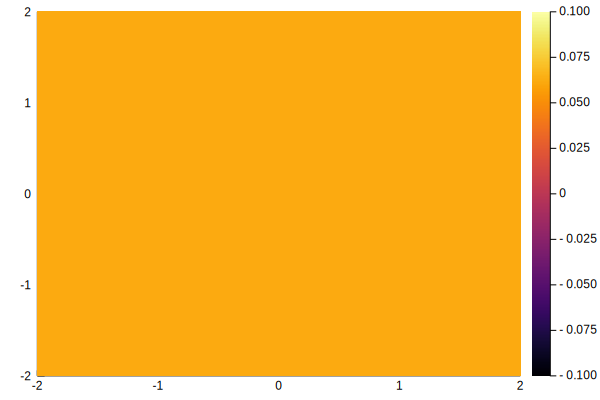

In [4]:
plot(A)

In [5]:
A = GaussianActions2D()

CBandits.DistributionActions2D((-2.0, 2.0), (-2.0, 2.0), DiagNormal(
dim: 2
μ: [0.0, 0.0]
Σ: [0.7225 0.0; 0.0 0.7225]
)
)

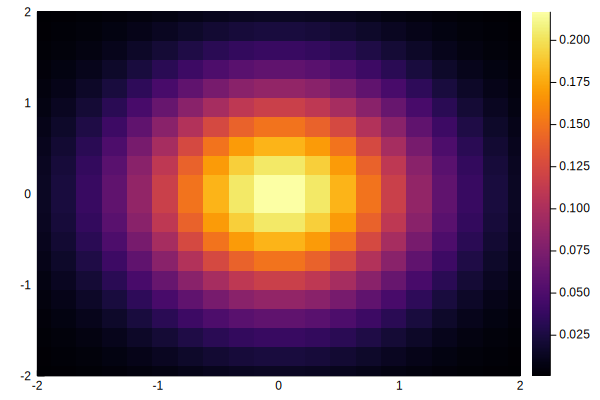

In [6]:
plot(A)

In [7]:
G = NarrowBump2D()

CBandits.DistributionFunc2D("NarrowBump2D", DiagNormal(
dim: 2
μ: [0.4, 0.4]
Σ: [0.04 0.0; 0.0 0.04]
)
, 2.0, (-2.0, 2.0), (-2.0, 2.0), 3.9786184275088883, 1.1517407851797484e-62, [0.398398, 0.398398])

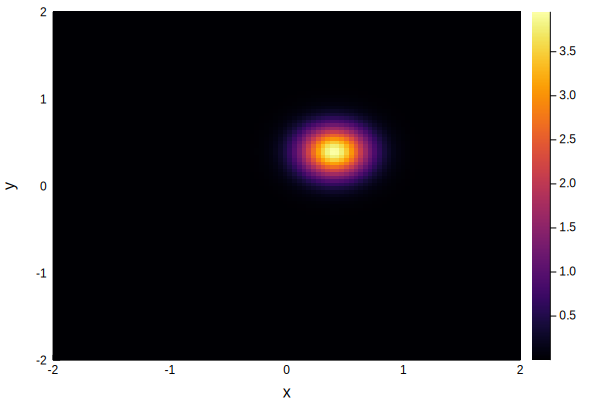

In [8]:
plot(G)

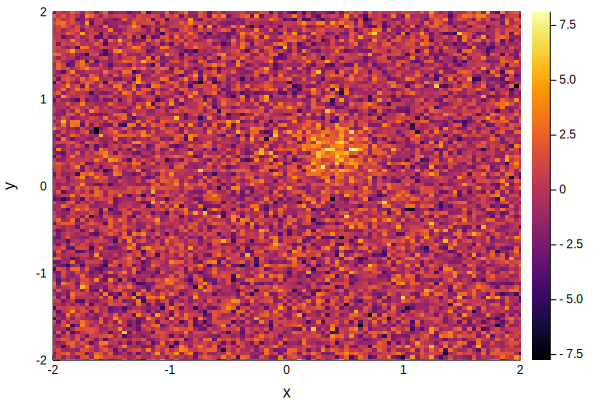

In [9]:
plot(G, Base.GLOBAL_RNG)

In [10]:
G = WideBump2D()

CBandits.DistributionFunc2D("WideBump2D", DiagNormal(
dim: 2
μ: [0.25, 0.25]
Σ: [0.04 0.0; 0.0 0.49]
)
, 0.5, (-2.0, 2.0), (-2.0, 2.0), 1.1368200595184386, 2.1355457897855272e-30, [0.25025, 0.25025])

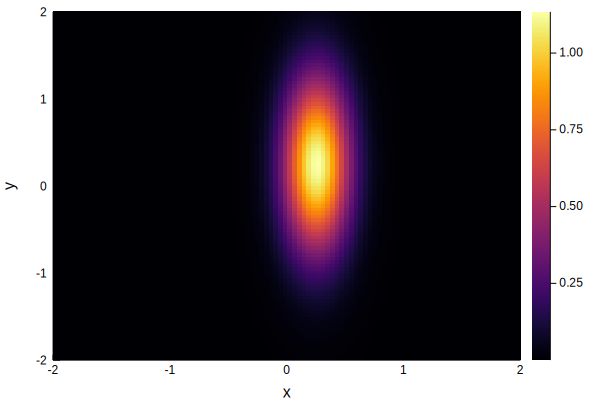

In [11]:
plot(G)

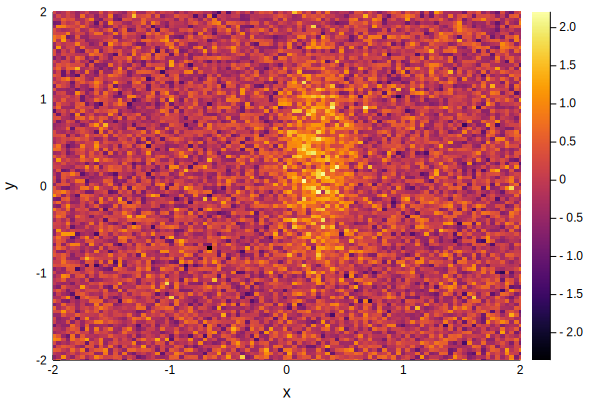

In [12]:
plot(G, Base.GLOBAL_RNG)

In [13]:
G = Rosenbrock()

CBandits.Rosenbrock("Rosenbrock", 10.0, (-2.0, 2.0), (-2.0, 2.0), -6.001992983979629e-6, -189.0, [0.998999, 0.998999])

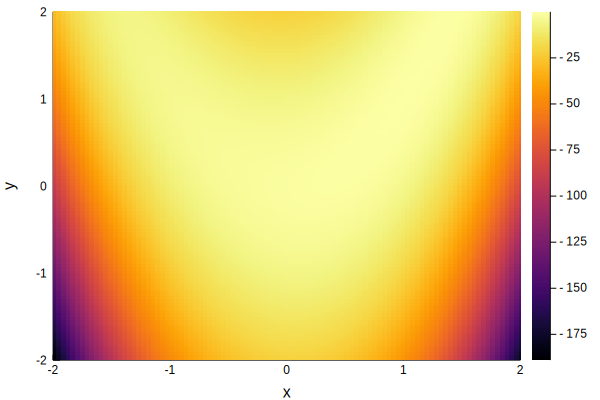

In [14]:
plot(G)

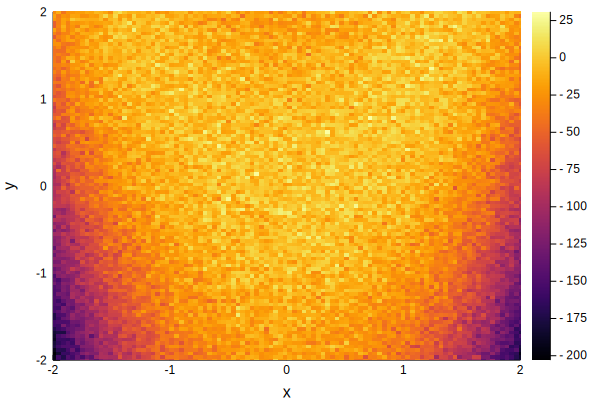

In [15]:
plot(G, Base.GLOBAL_RNG)

In [16]:
G = WideBump2D()

CBandits.DistributionFunc2D("WideBump2D", DiagNormal(
dim: 2
μ: [0.25, 0.25]
Σ: [0.04 0.0; 0.0 0.49]
)
, 0.5, (-2.0, 2.0), (-2.0, 2.0), 1.1368200595184386, 2.1355457897855272e-30, [0.25025, 0.25025])

In [17]:
A = UniformActions2D()

CBandits.UniformActions2D((-2.0, 2.0), (-2.0, 2.0), Distributions.Uniform{Float64}[Distributions.Uniform{Float64}(a=-2.0, b=2.0), Distributions.Uniform{Float64}(a=-2.0, b=2.0)])

In [18]:
b = RandomBandit(; actiondistr=A, outs=Set([:plot]))
rd_result = POMDPs.solve(b, G)

CBandits.RandomBanditResult(Any[[1.29459, 1.64143], [-1.29068, -0.88448], [-1.83079, -1.72692], [1.89287, 0.343246], [-0.959857, 1.64019], [0.621794, 0.30355], [1.8712, 1.07076], [-1.75053, -0.587485], [-1.82744, -0.928061], [-1.37345, 0.421187]  …  [-1.93304, -1.09656], [0.981248, 0.428165], [-1.53078, 1.80923], [-0.893392, 1.7254], [-1.83762, -1.09691], [-0.267883, 0.875396], [-1.53174, 0.154157], [-0.738667, 1.48859], [-1.63925, -0.395355], [-1.71197, 1.1987]], [-0.176504, 0.148668, -0.257105, -0.381402, -0.173177, -1.03902, -0.325632, 0.571138, 0.0557108, 0.150117  …  -0.164649, -1.25553, -0.406152, 0.291568, -0.375261, 0.254601, -0.436627, 0.07616, 0.216762, 0.259768], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}

In [19]:
animate(rd_result, "./uniform_random.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_random.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_random.gif")

In [20]:
b = PWUCB(; actiondistr=A, outs=Set([:plot]))
pw_result = POMDPs.solve(b, G)

CBandits.PWUCBResult(Any[[1.29459, 1.64143], [-0.88448, -1.18609], [1.89287, 0.343246], [-1.33186, 0.621794], [1.07076, -0.122785], [-0.928061, -1.73261], [1.35247, 1.65885], [1.20769, -1.85862], [-1.50271, -1.54292], [1.3523, -1.26354]  …  [-0.117451, -0.470189], [1.40082, 0.858356], [-1.70549, -1.54713], [-1.08707, -0.969499], [-0.551788, 0.788425], [-0.259432, -1.73641], [-0.298181, 0.192638], [1.3649, -1.24089], [1.35109, 1.19267], [-1.21026, 0.114343]], [-0.175954, -0.0930467, 0.138914, -0.803628, 0.154812, 0.144837, -0.104666, -0.885512, -0.414167, -0.111635  …  0.456316, 0.233473, -0.584489, -0.0507406, -0.42101, 0.447708, -0.306225, -0.560698, 0.13775, -0.489767], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=2}, 

In [21]:
animate(pw_result, "./uniform_pw.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_pw.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_pw.gif")

In [22]:
b = SBUCB(; actiondistr=A, outs=Set([:plot]))
sb_result = POMDPs.solve(b, G)

CBandits.SBUCBResult(Any[[1.29459, 1.64143], [-1.29068, -0.88448], [-1.83079, -1.72692], [1.89287, 0.343246], [-0.959857, 1.64019], [0.621794, 0.30355], [1.8712, 1.07076], [-1.75053, -0.587485], [-1.82744, -0.928061], [-1.37345, 0.421187]  …  [-1.93304, -1.09656], [0.981248, 0.428165], [-1.53078, 1.80923], [-0.893392, 1.7254], [-1.83762, -1.09691], [-0.267883, 0.875396], [-1.53174, 0.154157], [-0.738667, 1.48859], [-1.63925, -0.395355], [-1.71197, 1.1987]], [-0.176504, 0.148668, -0.257105, -0.381402, -0.173177, -1.03902, -0.325632, 0.387666, 0.0557108, 0.150117  …  -0.164649, -1.25553, -0.406152, 0.291568, -0.375261, 0.254601, -0.436627, 0.07616, 0.216762, 0.259768], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{Plots.GRBackend() n=3}, Plot{

In [23]:
animate(sb_result, "./uniform_sb.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_sb.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_sb.gif")

In [24]:
b = GPUCBGrid(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, log_length_scale=-0.5, outs=Set([:plot]))
gd_result = POMDPs.solve(b, WideBump2D())

CBandits.GPUCBGridResult(Any[[1.29459, 1.64143], [-2.0, -2.0], [2.0, -2.0], [0.949495, -1.43434], [2.0, -0.747475], [-0.141414, -0.464646], [-0.30303, -2.0], [-1.35354, 0.666667], [-1.9596, 0.0606061], [-0.787879, 1.27273]  …  [0.30303, 0.181818], [0.30303, 0.181818], [0.30303, 0.181818], [0.262626, 0.222222], [0.262626, 0.141414], [0.222222, 0.222222], [0.222222, 0.262626], [0.222222, 0.262626], [0.262626, 0.141414], [0.222222, 0.222222]], [-0.176504, -0.0674269, 0.293309, 0.148807, 0.0324738, 0.0449543, -0.256963, 0.787165, -0.344454, -0.381401  …  0.787941, 0.196104, 0.520081, -0.00829698, 0.0654805, 1.73469, 1.01467, 0.62451, 0.869109, 1.15736], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() 

In [25]:
animate(gd_result, "./uniform_gd_widebump2d.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gd_widebump2d.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gd_widebump2d.gif")

In [26]:
b = GPUCBGrid(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, log_length_scale=-0.5, outs=Set([:plot]))
gd_result = POMDPs.solve(b, NarrowBump2D())

CBandits.GPUCBGridResult(Any[[1.29459, 1.64143], [-2.0, -2.0], [2.0, -2.0], [1.31313, -1.87879], [2.0, -1.27273], [-0.020202, -2.0], [-2.0, 2.0], [-0.585859, 0.0606061], [-0.868687, -0.0606061], [-0.10101, 0.262626]  …  [-2.0, 0.666667], [-2.0, 0.666667], [-2.0, 0.747475], [-2.0, 0.424242], [-2.0, 0.949495], [-0.666667, -0.424242], [-0.626263, -0.343434], [-0.666667, -0.383838], [-2.0, -1.07071], [-0.828283, -0.626263]], [-0.706015, -0.269708, 1.17323, 0.594672, 0.129895, -0.218035, -1.02842, 3.14867, -1.37781, -1.38926  …  -1.21767, -3.58502, -2.28911, -4.56785, -4.22203, 2.43867, -0.44421, -2.00486, -1.00752, 0.129354], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend()

In [27]:
animate(gd_result, "./uniform_gd_narrowbump2d.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gd_narrowbump2d.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gd_narrowbump2d.gif")

In [48]:
b = GPUCB(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, log_length_scale=-0.5, outs=Set([:plot]))
gp_result = POMDPs.solve(b, NarrowBump2D())

CBandits.GPUCBResult(Any[[1.29459, 1.64143], [-1.18609, -1.83079], [-1.50271, -1.54292], [-0.75142, -1.21437], [-1.18609, -1.83079], [-1.18609, -1.83079], [-1.13678, 1.43518], [1.82851, -1.86963], [0.629061, 0.19197], [0.965268, -0.052469]  …  [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318], [0.578388, 0.330318]], [-0.706015, 2.28455, -0.357577, -2.74386, 3.04571, -2.33795, 0.126793, 0.295209, 2.47531, -1.9341  …  4.40667, -1.24248, 0.628074, 0.729189, 4.31657, 6.05335, 1.41144, 2.32404, 4.74114, 1.90498], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend

In [49]:
animate(gp_result, "./uniform_gp_narrowbump2d.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gp_narrowbump2d.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gp_narrowbump2d.gif")

In [46]:
b = GPUCB(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, mean_init=4.0, log_length_scale=-0.5, outs=Set([:plot]))
gp_result = POMDPs.solve(b, NarrowBump2D())

CBandits.GPUCBResult(Any[[1.29459, 1.64143], [-1.18609, -1.83079], [-1.52139, 1.06828], [1.36902, -1.32357], [-0.126412, -0.190173], [-0.470189, 1.9062], [1.98856, 0.0303781], [-0.298181, 0.192638], [-0.337975, -1.21026], [-1.95943, -0.516624]  …  [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384], [0.400499, 0.312384]], [-0.706015, 2.28455, -0.357577, -2.74386, 3.04731, -2.33795, 0.126793, 0.300458, 1.27308, -1.93977  …  5.50584, -0.143315, 1.72724, 1.82835, 5.41574, 7.15252, 2.51061, 3.42321, 5.84031, 3.00414], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBac

In [47]:
animate(gp_result, "./uniform_gp_optim_narrowbump2d.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gp_optim_narrowbump2d.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gp_optim_narrowbump2d.gif")

In [30]:
b = GPUCB(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, log_length_scale=-0.5, outs=Set([:plot]))
gp_result = POMDPs.solve(b, WideBump2D())

CBandits.GPUCBResult(Any[[1.29459, 1.64143], [-1.18609, -1.83079], [-1.82744, -0.928061], [-0.75142, -1.21437], [-1.62083, 1.79554], [-1.73863, 0.799959], [-0.259635, 1.9459], [1.82851, -1.86963], [0.629061, 0.19197], [-0.900034, 1.62484]  …  [0.291475, -0.0936941], [0.261648, 0.742604], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941], [0.291475, -0.0936941]], [-0.176504, 0.571138, -0.0893944, -0.685965, 0.761427, -0.584489, 0.0340489, 0.0738021, 0.506274, -0.484944  …  1.45905, -0.0535585, 0.514401, 0.539679, 1.43653, 1.87072, 0.710243, 0.938393, 1.54267, 0.833626], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBack

In [31]:
animate(gp_result, "./uniform_gp_widebump2d.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gp_widebump2d.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gp_widebump2d.gif")

In [32]:
b = GPUCB(; actiondistr=UniformActions2D(), grid=GridActions2D(), n_iters=200, log_length_scale=-0.5, outs=Set([:plot]))
gp_result = POMDPs.solve(b, Rosenbrock())

CBandits.GPUCBResult(Any[[1.29459, 1.64143], [-1.18609, -1.83079], [-1.52139, 1.06828], [1.36902, -1.32357], [0.576844, 0.677101], [0.576844, 0.677101], [0.0586759, 0.771883], [0.576844, 0.677101], [0.629061, 0.19197], [0.629061, 0.19197]  …  [1.1326, 0.875912], [1.1326, 0.875912], [0.967137, 0.639909], [1.1326, 0.875912], [0.861966, 0.583048], [-0.447704, 1.78401], [-0.447704, 1.78401], [0.861966, 0.583048], [0.861966, 0.583048], [0.861966, 0.583048]], [-3.62282, -45.7669, -15.9122, -64.985, 14.4566, -12.4617, -3.20463, 0.704089, 6.02025, -10.044  …  8.60985, -19.6359, -9.87534, -9.77758, 8.85772, 3.05427, -20.1553, -1.10493, 10.9806, -3.20027], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Float64[], Plots.Plot[Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4

In [33]:
animate(gp_result, "./uniform_gp_rosenbrock.gif")

INFO: Saved animation to C:\Users\rcnlee\.julia\v0.6\CBandits\notebooks\uniform_gp_rosenbrock.gif


Plots.AnimatedGif("C:\\Users\\rcnlee\\.julia\\v0.6\\CBandits\\notebooks\\uniform_gp_rosenbrock.gif")

In [34]:
study = MetricStudy2D(; G=WideBump2D(), n_seeds=150, n_iters=150)

CBandits.MetricStudy2D
  actiondistr: CBandits.UniformActions2D
  G: CBandits.DistributionFunc2D
  n_seeds: Int64 150
  n_iters: Int64 150


In [35]:
result = run_study(study)

CBandits.MetricStudy2DResult(Any["Random"=>[0.927619; 2.13443; … ; 161.002; 162.04], "PW"=>[0.927619; 2.01879; … ; 125.857; 126.772], "SB"=>[0.927619; 2.13443; … ; 159.162; 160.181], "GPUCB-Grid"=>[0.927619; 2.02788; … ; 82.0464; 82.1356], "GPUCB"=>[0.927619; 2.01525; … ; 83.351; 83.549], "GPUCB-Grid-optim"=>[0.927619; 2.08992; … ; 84.599; 84.6906], "GPUCB-optim"=>[0.927619; 2.06516; … ; 92.9045; 93.1096]], Any["Random"=>[1.06569; 1.04187; … ; 0.498328; 0.499448], "PW"=>[1.06569; 1.06569; … ; 0.453305; 0.416514], "SB"=>[1.06569; 1.04187; … ; 0.448204; 0.432657], "GPUCB-Grid"=>[1.06569; 1.07313; … ; 0.103639; 0.103671], "GPUCB"=>[1.06569; 1.07216; … ; 0.1526; 0.152405], "GPUCB-Grid-optim"=>[1.06569; 1.13682; … ; 0.0953757; 0.0968292], "GPUCB-optim"=>[1.06569; 1.13473; … ; 0.156897; 0.154107]])

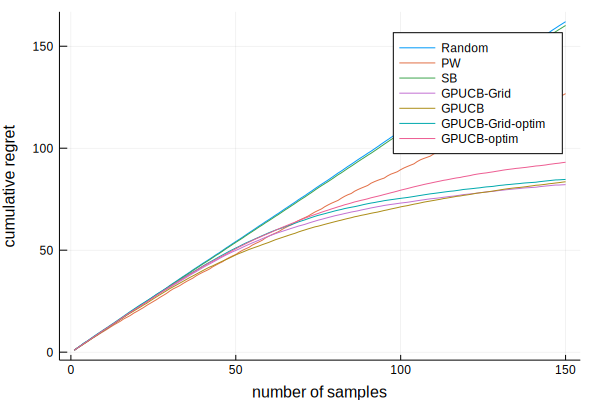

In [36]:
plot(result, :cum_regret)

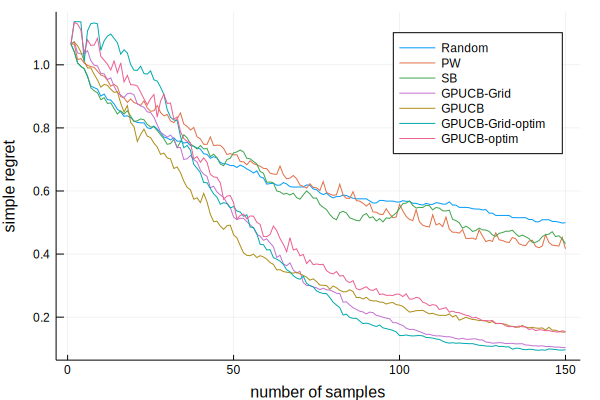

In [37]:
plot(result, :simple_regret)

In [38]:
study = MetricStudy2D(; G=NarrowBump2D(), n_seeds=150, n_iters=150)

CBandits.MetricStudy2D
  actiondistr: CBandits.UniformActions2D
  G: CBandits.DistributionFunc2D
  n_seeds: Int64 150
  n_iters: Int64 150


In [39]:
result = run_study(study)

CBandits.MetricStudy2DResult(Any["Random"=>[3.32885; 7.74098; … ; 587.25; 591.101], "PW"=>[3.32885; 7.31188; … ; 517.664; 521.111], "SB"=>[3.32885; 7.74098; … ; 584.649; 588.426], "GPUCB-Grid"=>[3.32885; 7.30871; … ; 452.595; 454.765], "GPUCB"=>[3.32885; 7.20006; … ; 452.77; 455.234], "GPUCB-Grid-optim"=>[3.32885; 7.40938; … ; 461.276; 463.362], "GPUCB-optim"=>[3.32885; 7.31865; … ; 478.206; 480.735]], Any["Random"=>[3.88112; 3.86468; … ; 3.10964; 3.1014], "PW"=>[3.88112; 3.88112; … ; 2.89805; 2.82944], "SB"=>[3.88112; 3.86468; … ; 2.95756; 2.95551], "GPUCB-Grid"=>[3.88112; 3.88463; … ; 2.39875; 2.39343], "GPUCB"=>[3.88112; 3.88432; … ; 2.4597; 2.45129], "GPUCB-Grid-optim"=>[3.88112; 3.97862; … ; 2.34604; 2.33103], "GPUCB-optim"=>[3.88112; 3.97856; … ; 2.49838; 2.46923]])

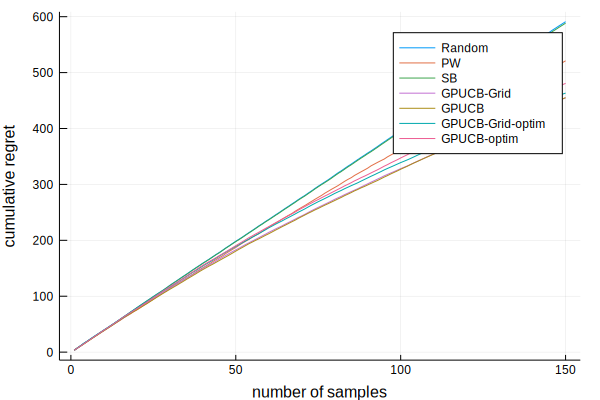

In [40]:
plot(result, :cum_regret)

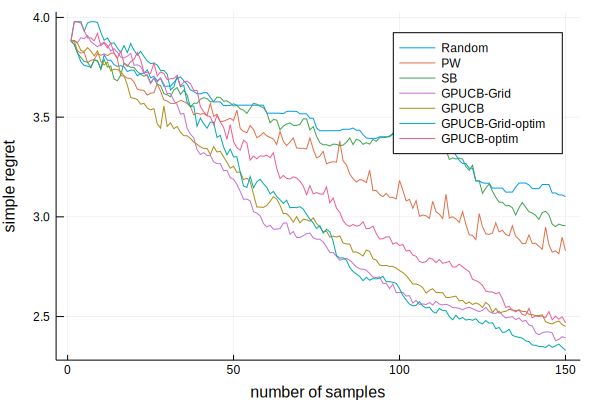

In [41]:
plot(result, :simple_regret)

In [42]:
study = MetricStudy2D(; G=Rosenbrock(), n_seeds=150, n_iters=50)

CBandits.MetricStudy2D
  actiondistr: CBandits.UniformActions2D
  G: CBandits.Rosenbrock
  n_seeds: Int64 150
  n_iters: Int64 50


In [43]:
result = run_study(study)

CBandits.MetricStudy2DResult(Any["Random"=>[19.271; 46.6457; … ; 1219.83; 1242.4], "PW"=>[19.271; 41.8129; … ; 512.499; 514.359], "SB"=>[19.271; 46.6457; … ; 1188.14; 1209.75], "GPUCB-Grid"=>[19.271; 97.4434; … ; 658.525; 662.516], "GPUCB"=>[19.271; 51.9081; … ; 422.822; 426.304], "GPUCB-Grid-optim"=>[19.271; 98.5971; … ; 676.892; 678.718], "GPUCB-optim"=>[19.271; 52.2662; … ; 426.098; 429.954]], Any["Random"=>[22.0324; 11.2848; … ; 3.77316; 3.8073], "PW"=>[22.0324; 22.0324; … ; 2.63832; 2.65594], "SB"=>[22.0324; 11.2848; … ; 3.9043; 3.8249], "GPUCB-Grid"=>[22.0324; 77.638; … ; 1.96733; 1.94811], "GPUCB"=>[22.0324; 32.1752; … ; 1.94399; 2.10294], "GPUCB-Grid-optim"=>[22.0324; 78.7195; … ; 2.17245; 2.12598], "GPUCB-optim"=>[22.0324; 32.3952; … ; 2.01807; 2.00892]])

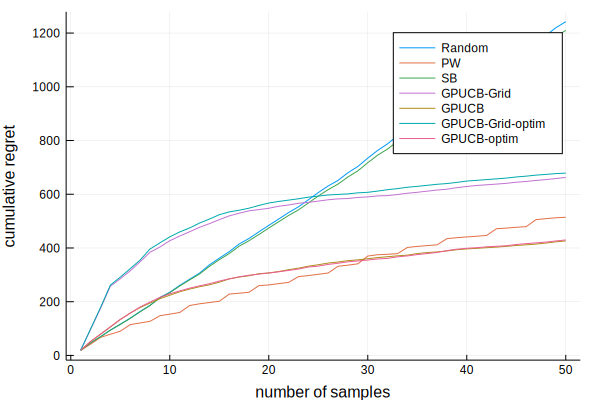

In [44]:
plot(result, :cum_regret)

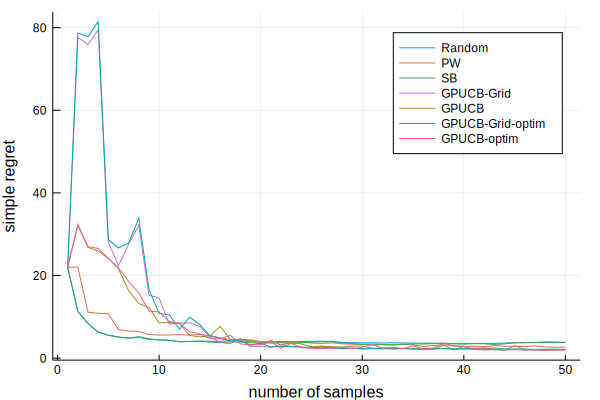

In [45]:
plot(result, :simple_regret)

In [3]:
study = LengthScaleStudy2D(; G=WideBump2D(), n_seeds=150, n_iters=150)

CBandits.LengthScaleStudy2D
  actiondistr: CBandits.UniformActions2D
  G: CBandits.DistributionFunc2D
  n_seeds: Int64 150
  n_iters: Int64 150
  ls: Array{Float64}((7,)) [0.05, 0.1, 0.3, 0.6, 0.8, 1.0, 1.5]


In [4]:
result = run_study(study)

CBandits.LengthScaleStudy2DResult(Any["Random"=>[0.927619; 2.13443; … ; 161.002; 162.04], "PW"=>[0.927619; 2.01879; … ; 125.857; 126.772], "SB"=>[0.927619; 2.13443; … ; 159.162; 160.181], "GPUCB-Grid"=>[0.927619; 2.02788; … ; 82.0464; 82.1356], "GPUCB-l=0.05"=>[0.927619; 1.99981; … ; 144.769; 145.698], "GPUCB-l=0.1"=>[0.927619; 1.99129; … ; 145.445; 146.482], "GPUCB-l=0.3"=>[0.927619; 2.00155; … ; 128.952; 129.404], "GPUCB-l=0.6"=>[0.927619; 2.01605; … ; 82.6184; 82.8143], "GPUCB-l=0.8"=>[0.927619; 2.01959; … ; 84.5771; 84.8201], "GPUCB-l=1.0"=>[0.927619; 2.01262; … ; 87.4554; 87.766], "GPUCB-l=1.5"=>[0.927619; 2.03918; … ; 104.178; 104.683]], Any["Random"=>[1.06569; 1.04187; … ; 0.498328; 0.499448], "PW"=>[1.06569; 1.06569; … ; 0.453305; 0.416514], "SB"=>[1.06569; 1.04187; … ; 0.448204; 0.432657], "GPUCB-Grid"=>[1.06569; 1.07313; … ; 0.103639; 0.103671], "GPUCB-l=0.05"=>[1.06569; 1.06092; … ; 0.354445; 0.34973], "GPUCB-l=0.1"=>[1.06569; 1.07216; … ; 0.266673; 0.26313], "GPUCB-l=0.3"=>

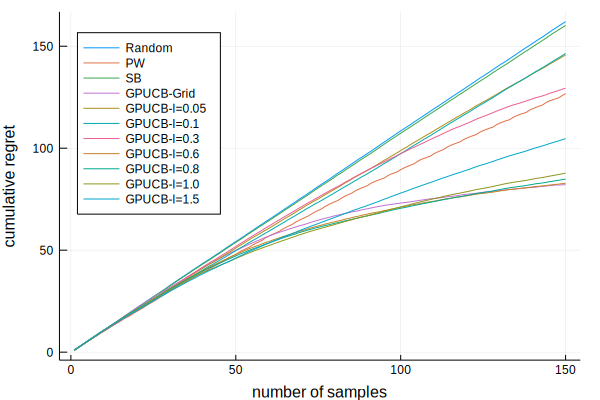

In [5]:
plot(result, :cum_regret)

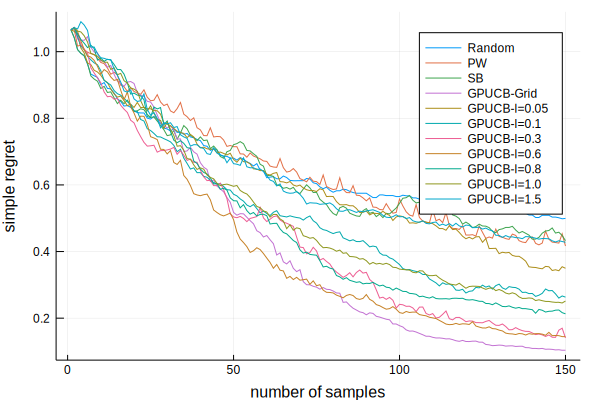

In [6]:
plot(result, :simple_regret)